## Imports

Nous utilisons des bibliothèques classiques pour la science des données : `numpy`, `pandas`, `sklearn`, `matplotlib`.

In [ ]:
# numpy et pandas pour la manipulation des données
import numpy as np
import pandas as pd

# Gestion du système de fichiers
import os

# sklearn preprocessing pour traiter les variables catégorielles
from sklearn.preprocessing import LabelEncoder

# matplotlib et seaborn pour les tracés
import matplotlib.pyplot as plt
import seaborn as sns


## Lecture des données

Tout d'abord, nous pouvons répertorier tous les fichiers de données disponibles. Il y a un total de 9 fichiers : 1 fichier principal pour l'entraînement (avec la cible), 1 fichier principal pour les tests (sans la cible), 1 fichier d'exemple de soumission, et 6 autres fichiers contenant des informations supplémentaires sur chaque prêt.

In [ ]:
from google.colab import drive
import pandas as pd

# Montez Google Drive dans Colab
drive.mount('/content/drive')

# Chemin vers le fichier CSV sur Google Drive
file_path = '/content/drive/MyDrive/oc_projet_4/Data/application_train.csv'

# Chargement des données d'entraitement à partir du fichier CSV
app_train = pd.read_csv(file_path)

# Affichage des informations sur les données d'entraînement
print("Données d'entraitement: ", app_train.shape)
app_train.head()

Mounted at /content/drive
Données d'entraitement:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Les données d'entraînement comprennent 307 511 observations (chacune correspondant à un prêt distinct) et 122 caractéristiques (variables), y compris la variable `TARGET` (l'étiquette que nous souhaitons prédire).

In [ ]:
from google.colab import drive
import pandas as pd

# Chemin vers le fichier CSV sur Google Drive
file_path = '/content/drive/MyDrive/oc_projet_4/Data/application_test.csv'

# Chargement des données à partir du fichier CSV
app_test = pd.read_csv(file_path)

# Affichage des informations sur les données d'entraînement
print('Données de test: ', app_test.shape)
app_test.head()

Données de test:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


L'ensemble de test est considérablement plus petit et ne comporte pas de colonne `TARGET`.

# Analyse exploratoire des données

L'Analyse exploratoire des données (AED) est un processus ouvert où nous calculons des statistiques et créons des graphiques pour identifier des tendances, des anomalies, des motifs ou des relations au sein des données. L'objectif de l'AED est d'apprendre ce que nos données peuvent nous révéler. Elle commence généralement par une vue d'ensemble, puis se concentre sur des domaines spécifiques au fur et à mesure que nous découvrons des aspects intéressants des données. Les résultats peuvent être intéressants en eux-mêmes, ou ils peuvent être utilisés pour orienter nos choix de modélisation, comme nous aider à décider quelles caractéristiques utiliser.

## Examiner la distribution de la colonne Target

La cible est ce que l'on nous demande de prédire : soit un 0 indiquant que le prêt a été remboursé à temps, soit un 1 indiquant que le client a rencontré des difficultés de paiement. Nous pouvons d'abord examiner le nombre de prêts tombant dans chaque catégorie.





In [ ]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

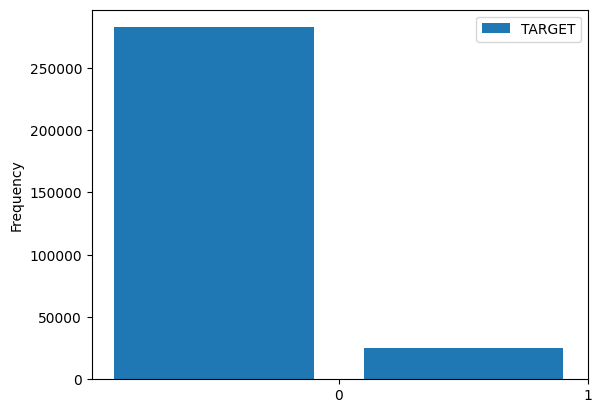

In [ ]:
# Tracer l'histogramme avec des positions spécifiques sur l'axe des abscisses
app_train['TARGET'].astype(int).plot.hist(bins=[-0.5, 0.5, 1.5], rwidth=0.8, align='left')

# Remplacer les étiquettes de l'axe des abscisses
plt.xticks([0, 1])

# Ajouter une légende
plt.legend(['TARGET'])

# Afficher le graphique
plt.show()


À partir de cette information, nous constatons qu'il s'agit d'un problème de déséquilibre des classes. Il y a beaucoup plus de prêts qui ont été remboursés à temps que de prêts qui n'ont pas été remboursés. Une fois que nous utilisons des modèles d'apprentissage automatique plus sophistiqués, nous pouvons pondérer les classes en fonction de leur représentation dans les données pour refléter ce déséquilibre.

## Examiner les valeurs manquantes

Ensuite, nous pouvons examiner le nombre et le pourcentage de valeurs manquantes dans chaque colonne.

In [ ]:
# Fonction pour calculer les valeurs manquantes par colonne
def tableau_valeurs_manquantes(df):
        # Total des valeurs manquantes
        val_manquantes = df.isnull().sum()

        # Pourcentage de valeurs manquantes
        pourcentage_val_manquantes = 100 * df.isnull().sum() / len(df)

        # Créer un tableau avec les résultats
        tableau_val_manquantes = pd.concat([val_manquantes, pourcentage_val_manquantes], axis=1)

        # Renommer les colonnes
        tableau_val_manquantes_colonnes_renomme = tableau_val_manquantes.rename(
        columns = {0 : 'Valeurs Manquantes', 1 : '% du Total des Valeurs'})

        # Trier le tableau par pourcentage de valeurs manquantes de manière décroissante
        tableau_val_manquantes_colonnes_renomme = tableau_val_manquantes_colonnes_renomme[
            tableau_val_manquantes_colonnes_renomme.iloc[:,1] != 0].sort_values(
        '% du Total des Valeurs', ascending=False).round(1)

        # Afficher quelques informations récapitulatives
        print ("Votre dataframe sélectionné a " + str(df.shape[1]) + " colonnes.\n"
            "Il y a " + str(tableau_val_manquantes_colonnes_renomme.shape[0]) +
              " colonnes qui ont des valeurs manquantes.")

        # Retourner le dataframe avec les informations sur les valeurs manquantes
        return tableau_val_manquantes_colonnes_renomme


In [ ]:
# Statistiques des valeurs manquantes
missing_values = tableau_valeurs_manquantes(app_train)
missing_values.head(20)

Votre dataframe sélectionné a 122 colonnes.
Il y a 67 colonnes qui ont des valeurs manquantes.


,Valeurs Manquantes,% du Total des Valeurs
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


Lorsqu'il sera temps de construire nos modèles d'apprentissage automatique, nous devrons compléter ces valeurs manquantes (appelées imputation).

## Types de Colonnes

Examinons le nombre de colonnes pour chaque type de données. Les variables `int64` et `float64` sont numériques (pouvant être soit discrètes, soit continues). Les colonnes de type `object` contiennent des chaînes de caractères et représentent des caractéristiques catégorielles.

In [ ]:
# Nombre de chaque type de colonne
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

L'output indique la répartition des types de données dans le DataFrame `app_train`. On observe que :

- Il y a 65 colonnes de type `float64`, ce qui suggère la présence de nombreuses variables numériques continues ou décimales.
- Il y a 41 colonnes de type `int64`, indiquant la présence de variables numériques discrètes.
- Enfin, il y a 16 colonnes de type `object`, ce qui suggère la présence de variables catégorielles ou de chaînes de caractères.

Ces informations sont utiles pour comprendre la composition du jeu de données et orienter le choix des méthodes d'analyse ou de prétraitement appropriées en fonction des types de variables présentes.

Regardons maintenant le nombre d'entrées uniques dans chacune des colonnes de type object (catégoriel).

In [ ]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Le résultat montre le nombre d'entrées uniques dans chaque colonne de type object (catégoriel). Par exemple :

- `NAME_CONTRACT_TYPE` a 2 entrées uniques.
- `CODE_GENDER` a 3 entrées uniques.
- `FLAG_OWN_CAR` a 2 entrées uniques.

Ces informations sont importantes pour comprendre la diversité des catégories présentes dans les colonnes catégorielles. Cela peut influencer les choix de traitement et d'analyse des données catégorielles, tels que l'encodage ou la gestion des catégories rares.


La plupart des variables catégorielles ont un nombre relativement restreint d'entrées uniques. Nous devrons trouver une méthode appropriée pour traiter ces variables catégorielles.

##Traitement des Valeurs Aberrantes

In [ ]:
from tabulate import tabulate

# Sélection des colonnes catégorielles
categorical_columns = app_train.select_dtypes(include='object').columns

# Affichage des valeurs uniques catégorielles dans un tableau
for col in categorical_columns:
    unique_values = app_train[col].unique()
    print(f"\n{col}:\n")
    print(tabulate(enumerate(unique_values, 1), headers=['Index', 'Valeur'], tablefmt='pretty'))



NAME_CONTRACT_TYPE:

+-------+-----------------+
| Index |     Valeur      |
+-------+-----------------+
|   1   |   Cash loans    |
|   2   | Revolving loans |
+-------+-----------------+

CODE_GENDER:

+-------+--------+
| Index | Valeur |
+-------+--------+
|   1   |   M    |
|   2   |   F    |
|   3   |  XNA   |
+-------+--------+

FLAG_OWN_CAR:

+-------+--------+
| Index | Valeur |
+-------+--------+
|   1   |   N    |
|   2   |   Y    |
+-------+--------+

FLAG_OWN_REALTY:

+-------+--------+
| Index | Valeur |
+-------+--------+
|   1   |   Y    |
|   2   |   N    |
+-------+--------+

NAME_TYPE_SUITE:

+-------+-----------------+
| Index |     Valeur      |
+-------+-----------------+
|   1   |  Unaccompanied  |
|   2   |     Family      |
|   3   | Spouse, partner |
|   4   |    Children     |
|   5   |     Other_A     |
|   6   |       nan       |
|   7   |     Other_B     |
|   8   | Group of people |
+-------+-----------------+

NAME_INCOME_TYPE:

+-------+---------------

Toutes les valeurs uniques dans les colonnes catégorielles semblent être conformes et ne présentent pas d'aberrations apparentes. Cela suggère une cohérence dans la nature des données catégorielles, sans valeurs inattendues.


In [ ]:
import pandas as pd

# Sélection des colonnes numériques
numeric_columns = app_train.select_dtypes(include='number')

# Calcul des statistiques descriptives
description = numeric_columns.describe().T

# Création d'un DataFrame avec les statistiques
stats_df = pd.DataFrame({
    'Count': description['count'],
    'Mean': description['mean'],
    'Std Dev': description['std'],
    'Min': description['min'],
    '25%': description['25%'],
    '50% (Median)': description['50%'],
    '75%': description['75%'],
    'Max': description['max']
})

# Ajuster la largeur d'affichage des colonnes pour éviter le retour à la ligne
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)  # Format d'affichage sans écriture scientifique

# Affichage du DataFrame
print(stats_df)

# Réinitialiser les options à leurs valeurs par défaut si nécessaire
pd.reset_option('display.width')
pd.reset_option('display.max_rows')
pd.reset_option('display.float_format')




                                   Count        Mean     Std Dev         Min         25%  50% (Median)         75%            Max
SK_ID_CURR                   307511.0000 278180.5186 102790.1753 100002.0000 189145.5000   278202.0000 367142.5000    456255.0000
TARGET                       307511.0000      0.0807      0.2724      0.0000      0.0000        0.0000      0.0000         1.0000
CNT_CHILDREN                 307511.0000      0.4171      0.7221      0.0000      0.0000        0.0000      1.0000        19.0000
AMT_INCOME_TOTAL             307511.0000 168797.9193 237123.1463  25650.0000 112500.0000   147150.0000 202500.0000 117000000.0000
AMT_CREDIT                   307511.0000 599025.9997 402490.7770  45000.0000 270000.0000   513531.0000 808650.0000   4050000.0000
AMT_ANNUITY                  307499.0000  27108.5739  14493.7373   1615.5000  16524.0000    24903.0000  34596.0000    258025.5000
AMT_GOODS_PRICE              307233.0000 538396.2074 369446.4605  40500.0000 238500.0000  

**Analyse des Statistiques des Variables d'Intérêt**

Les statistiques descriptives des variables suivantes ont retenu mon attention en raison de valeurs extrêmes potentielles. Pour mieux comprendre la distribution de ces variables, des histogrammes et des diagrammes à moustaches ont été créés ci-dessous.

#### Signification des Variables

- **OBS_30_CNT_SOCIAL_CIRCLE**: Nombre d'observations dans l'entourage social du client avec un retard observable de 30 jours (jours de retard).
- **DEF_30_CNT_SOCIAL_CIRCLE**: Nombre d'observations dans l'entourage social du client ayant fait défaut sur 30 jours (jours de retard).
- **OBS_60_CNT_SOCIAL_CIRCLE**: Nombre d'observations dans l'entourage social du client avec un retard observable de 60 jours (jours de retard).


In [ ]:
# Variables à examiner
variables_of_interest = ['CNT_CHILDREN', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']

# Ajuster la largeur d'affichage des colonnes pour éviter le retour à la ligne
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)  # Format d'affichage sans écriture scientifique

# Affichage du DataFrame
print(stats_df.loc[variables_of_interest])

# Réinitialiser les options à leurs valeurs par défaut
pd.reset_option('display.width')
pd.reset_option('display.max_rows')
pd.reset_option('display.float_format')

                               Count   Mean  Std Dev    Min    25%  50% (Median)    75%      Max
CNT_CHILDREN             307511.0000 0.4171   0.7221 0.0000 0.0000        0.0000 1.0000  19.0000
OBS_30_CNT_SOCIAL_CIRCLE 306490.0000 1.4222   2.4010 0.0000 0.0000        0.0000 2.0000 348.0000
DEF_30_CNT_SOCIAL_CIRCLE 306490.0000 0.1434   0.4467 0.0000 0.0000        0.0000 0.0000  34.0000
OBS_60_CNT_SOCIAL_CIRCLE 306490.0000 1.4053   2.3798 0.0000 0.0000        0.0000 2.0000 344.0000
DEF_60_CNT_SOCIAL_CIRCLE 306490.0000 0.1000   0.3623 0.0000 0.0000        0.0000 0.0000  24.0000


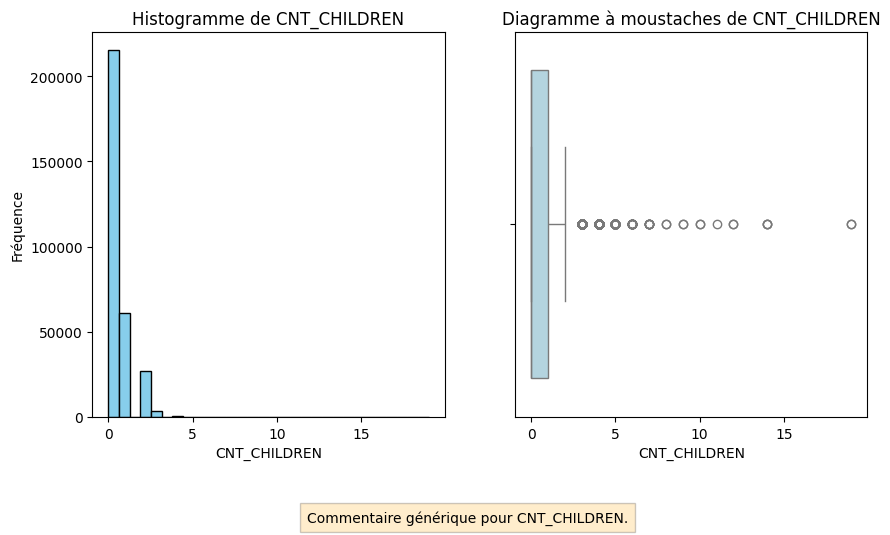

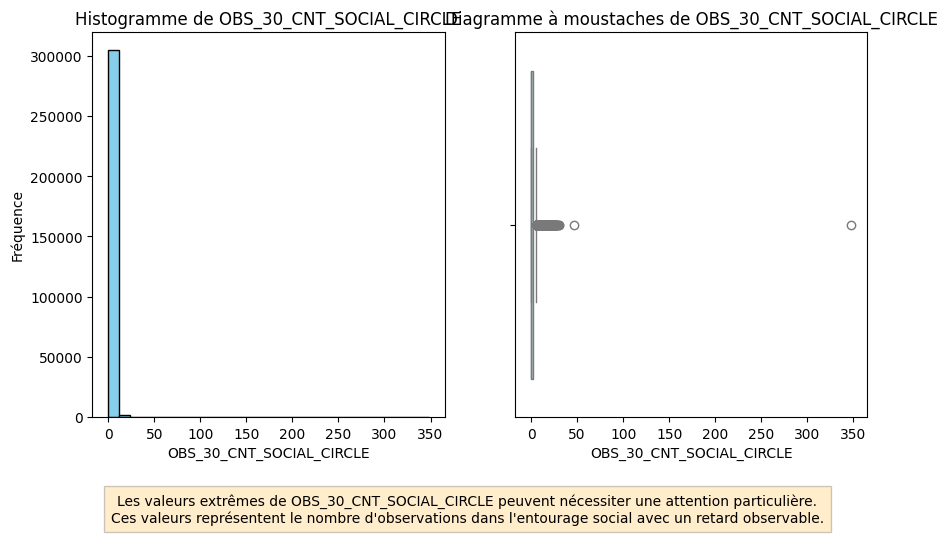

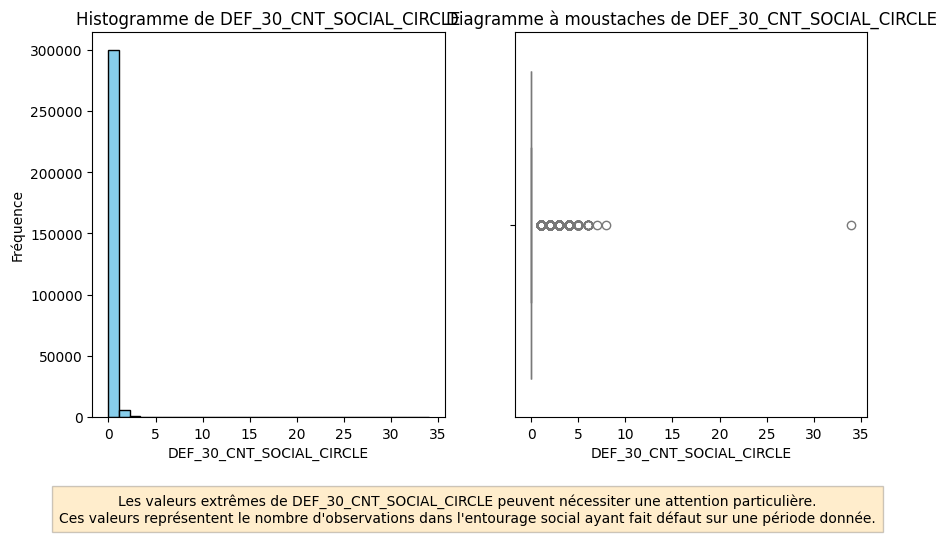

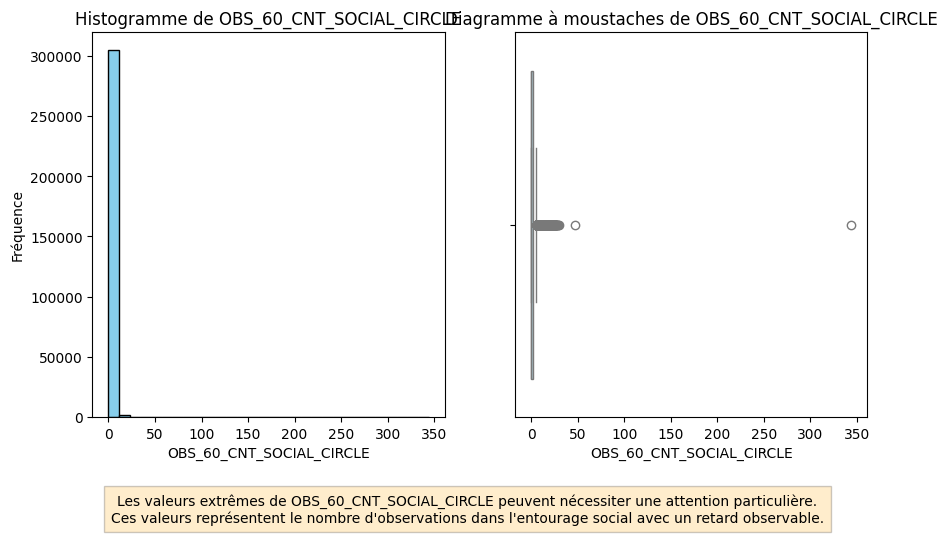

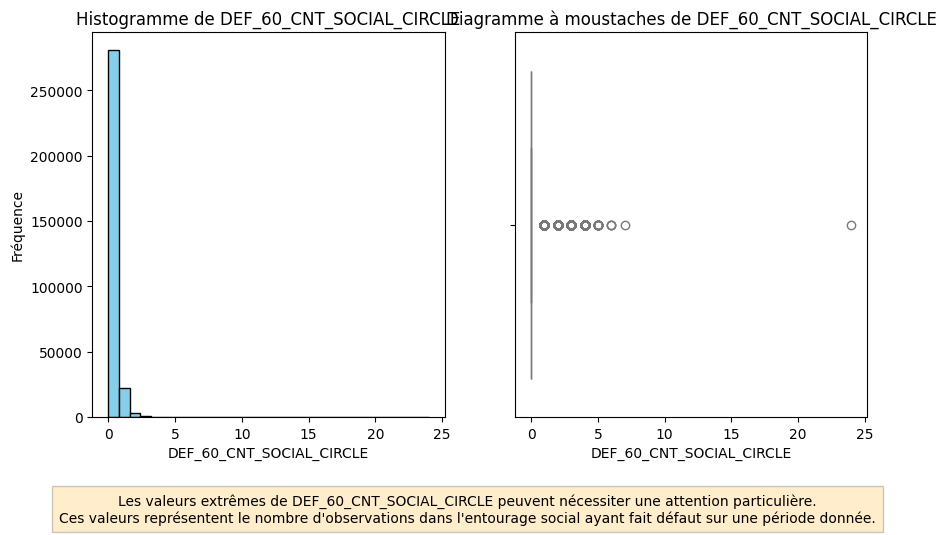

In [ ]:
import seaborn as sns

# Variables à examiner
variables_of_interest = ['CNT_CHILDREN', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']

# Création d'histogrammes pour les variables d'intérêt et ajout du commentaire
for variable in variables_of_interest:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(app_train[variable], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogramme de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Fréquence')

    # Création d'un boxplot avec Seaborn
    plt.subplot(1, 2, 2)
    sns.boxplot(x=app_train[variable], color='lightblue')
    plt.title(f'Diagramme à moustaches de {variable}')
    plt.xlabel(variable)

    # Ajout du commentaire
    if variable.startswith('OBS'):
        comment = f"Les valeurs extrêmes de {variable} peuvent nécessiter une attention particulière.\nCes valeurs représentent le nombre d'observations dans l'entourage social avec un retard observable."
    elif variable.startswith('DEF'):
        comment = f"Les valeurs extrêmes de {variable} peuvent nécessiter une attention particulière.\nCes valeurs représentent le nombre d'observations dans l'entourage social ayant fait défaut sur une période donnée."
    else:
        comment = f"Commentaire générique pour {variable}."

    plt.figtext(0.5, -0.1, comment, ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.2, "pad":5})

    # Affichage des graphiques
    plt.show()


**Analyse des Diagrammes à Moustaches**

En observant les diagrammes à moustaches pour les variables `CNT_CHILDREN`, `OBS_30_CNT_SOCIAL_CIRCLE`, `DEF_30_CNT_SOCIAL_CIRCLE`, `OBS_60_CNT_SOCIAL_CIRCLE`, et `DEF_60_CNT_SOCIAL_CIRCLE`, plusieurs points méritent notre attention :

- La variable `CNT_CHILDREN` semble avoir quelques valeurs aberrantes.
- Pour les variables liées à l'entourage social (`OBS_30_CNT_SOCIAL_CIRCLE`, `DEF_30_CNT_SOCIAL_CIRCLE`, `OBS_60_CNT_SOCIAL_CIRCLE`, `DEF_60_CNT_SOCIAL_CIRCLE`), des valeurs extrêmes ont été identifiées.

Afin de traiter ces valeurs aberrantes, nous allons fixer des seuils respectifs pour chaque variable et remplacer les valeurs aberrantes par la médiane de ces variables.
- `CNT_CHILDREN` : 10
- `OBS_30_CNT_SOCIAL_CIRCLE` : 40
- `DEF_30_CNT_SOCIAL_CIRCLE` : 5
- `OBS_60_CNT_SOCIAL_CIRCLE` : 40
- `DEF_60_CNT_SOCIAL_CIRCLE` : 4


In [ ]:
import numpy as np

# Affichage des dimensions du DataFrame avant nettoyage
print(f"\n**Dimensions du DataFrame avant nettoyage :** {app_train.shape}\n")

# Affichage du nombre de NaN avant nettoyage
print("**Nombre de NaN avant nettoyage :**")
print(app_train[variables_of_interest].isnull().sum())

# Fixer les seuils
seuils = {
    'CNT_CHILDREN': 10,
    'OBS_30_CNT_SOCIAL_CIRCLE': 40,
    'DEF_30_CNT_SOCIAL_CIRCLE': 5,
    'OBS_60_CNT_SOCIAL_CIRCLE': 40,
    'DEF_60_CNT_SOCIAL_CIRCLE': 4
}

# Initialisation d'un dictionnaire pour stocker le nombre de lignes avec au moins une observation aberrante par catégorie
lignes_aberrantes_par_categorie_avant = {}

# Liste des variables
variables_of_interest = ['CNT_CHILDREN', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']

# Calcul du nombre de lignes avec au moins une observation aberrante par catégorie avant nettoyage
for variable in variables_of_interest:
    seuil = seuils.get(variable, None)
    if seuil is not None:
        lignes_aberrantes_par_categorie_avant[variable] = app_train[app_train[variable] >= seuil][variable]
        lignes_aberrantes_par_categorie_avant_count = len(lignes_aberrantes_par_categorie_avant[variable])

        print(f"\n**Valeurs aberrantes de {variable} avant nettoyage ({lignes_aberrantes_par_categorie_avant_count} valeurs) :**")
        print(lignes_aberrantes_par_categorie_avant[variable])

# Affichage du nombre de lignes avec au moins une observation aberrante par catégorie avant nettoyage
print("\n**Nombre de lignes avec au moins une observation aberrante par catégorie avant nettoyage :**")
for variable, count in lignes_aberrantes_par_categorie_avant.items():
    print(f"- {variable}: {len(count)}")

# Calcul de la médiane pour chaque variable d'intérêt
median_values = app_train[variables_of_interest].median()

# Remplacement des valeurs aberrantes par la médiane
for variable, seuil in seuils.items():
    app_train[variable] = np.where(app_train[variable] >= seuil, median_values[variable], app_train[variable])

# Initialisation d'un dictionnaire pour stocker le nombre de lignes avec au moins une observation aberrante par catégorie après nettoyage
lignes_aberrantes_par_categorie_apres = {}

# Calcul du nombre de lignes avec au moins une observation aberrante par catégorie après nettoyage
for variable in variables_of_interest:
    lignes_aberrantes_par_categorie_apres[variable] = app_train[app_train[variable] >= seuils[variable]][variable]
    lignes_aberrantes_par_categorie_apres_count = len(lignes_aberrantes_par_categorie_apres[variable])

    print(f"\n**Valeurs aberrantes de {variable} après nettoyage ({lignes_aberrantes_par_categorie_apres_count} valeurs) :**")
    print(lignes_aberrantes_par_categorie_apres[variable])

# Affichage des dimensions du DataFrame après nettoyage
print(f"\n**Dimensions du DataFrame après nettoyage :** {app_train.shape}\n")

# Affichage du nombre de NaN après nettoyage
print("**Nombre de NaN après nettoyage :**")
print(app_train[variables_of_interest].isnull().sum())



**Dimensions du DataFrame avant nettoyage :** (307511, 122)

**Nombre de NaN avant nettoyage :**
CNT_CHILDREN                   0
OBS_30_CNT_SOCIAL_CIRCLE    1021
DEF_30_CNT_SOCIAL_CIRCLE    1021
OBS_60_CNT_SOCIAL_CIRCLE    1021
DEF_60_CNT_SOCIAL_CIRCLE    1021
dtype: int64

**Valeurs aberrantes de CNT_CHILDREN avant nettoyage (10 valeurs) :**
34545     11
80948     12
132585    10
155369    19
171125    12
176011    14
183878    14
186820    10
265784    19
267998    14
Name: CNT_CHILDREN, dtype: int64

**Valeurs aberrantes de OBS_30_CNT_SOCIAL_CIRCLE avant nettoyage (2 valeurs) :**
77497      47.0
148403    348.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

**Valeurs aberrantes de DEF_30_CNT_SOCIAL_CIRCLE avant nettoyage (70 valeurs) :**
2555      5.0
4954      5.0
11018     5.0
11630     5.0
15392     6.0
         ... 
279489    5.0
288308    5.0
296808    5.0
298686    6.0
305921    5.0
Name: DEF_30_CNT_SOCIAL_CIRCLE, Length: 70, dtype: float64

**Valeurs aberrantes de OBS_60_C

**Et en ce qui concerne la durée d'emploi ?**

In [ ]:
# Affichage de la situation pour la variable 'DAYS_EMPLOYED'
print("\n**Situation pour la variable 'DAYS_EMPLOYED' :**")
print(app_train['DAYS_EMPLOYED'].describe())


**Situation pour la variable 'DAYS_EMPLOYED' :**
count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


Cela ne semble pas correct ! La valeur maximale (en plus d'être positive) représente environ 1000 ans !


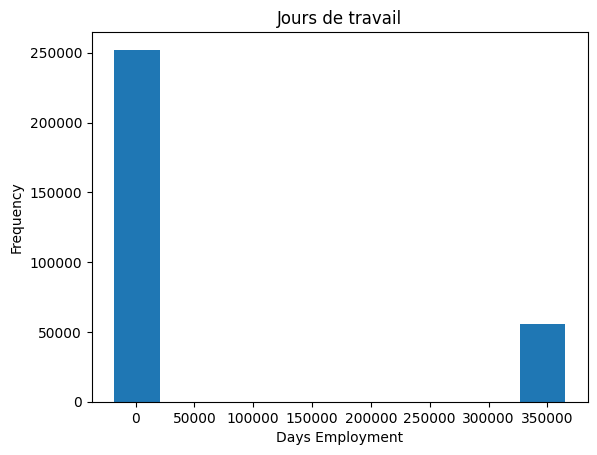

In [ ]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Jours de travail');
plt.xlabel('Days Employment');

Créons un sous-ensemble des clients anormaux et voyons s'ils ont tendance à avoir des taux de défaut plus élevés ou plus bas que le reste des clients.


In [ ]:
# Sous-ensemble des clients anormaux et non anormaux
anomalies = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anomalies = app_train[app_train['DAYS_EMPLOYED'] != 365243]

# Taux de défaut pour les clients non anormaux et anormaux
taux_defaut_non_anormaux = 100 * non_anomalies['TARGET'].mean()
taux_defaut_anormaux = 100 * anomalies['TARGET'].mean()

# Affichage des résultats
print('Le taux de défaut pour les clients non anormaux est de %0.2f%%' % taux_defaut_non_anormaux)
print('Le taux de défaut pour les clients anormaux est de %0.2f%%' % taux_defaut_anormaux)


Le taux de défaut pour les clients non anormaux est de 8.66%
Le taux de défaut pour les clients anormaux est de 5.40%


Il semble y avoir une différence dans les taux de défaut entre les clients avec des jours d'emploi anormaux et ceux sans.

Il s'avère que les anomalies ont un taux de défaut plus bas.


La gestion des anomalies dépend de la situation, sans règles fixes. L'une des approches les plus sûres consiste simplement à définir les anomalies comme une valeur manquante, puis à les remplir (à l'aide de l'imputation) avant l'apprentissage automatique. Dans ce cas, étant donné que toutes les anomalies ont la même valeur exacte, nous voulons les remplir avec la même valeur au cas où tous ces prêts partagent quelque chose en commun. Les valeurs anormales semblent avoir une certaine importance, nous voulons donc indiquer au modèle d'apprentissage automatique si nous avons effectivement rempli ces valeurs. En solution, nous remplirons les valeurs anormales avec une valeur nulle (np.nan), puis créerons une nouvelle colonne booléenne indiquant si la valeur était ou non anormale.

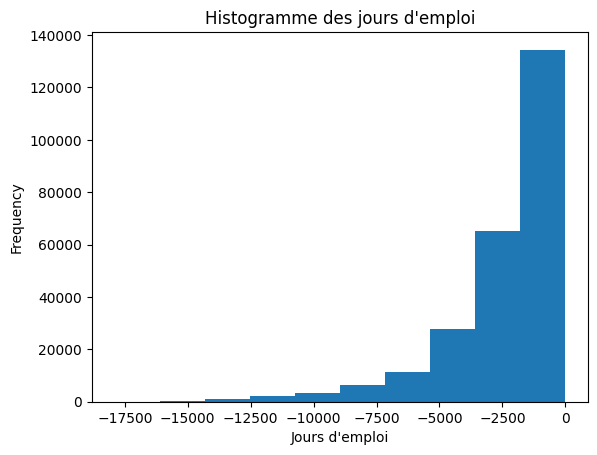

In [ ]:
# Créer une colonne flag pour les valeurs anormales
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Remplacer les valeurs anormales par nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

# Afficher l'histogramme des jours de travail
app_train['DAYS_EMPLOYED'].plot.hist(title='Histogramme des jours d\'emploi')
plt.xlabel('Jours d\'emploi');


La distribution semble beaucoup plus conforme à ce que l'on pourrait attendre, et nous avons également créé une nouvelle colonne pour indiquer au modèle que ces valeurs étaient initialement anormales (car nous devrons remplir les NaN par une valeur, probablement la médiane de la colonne). Les autres colonnes avec "DAYS" dans le dataframe semblent être conformes à ce que nous attendons, sans valeurs aberrantes évidentes.

Note extrêmement importante, tout ce que nous faisons sur les données d'entraînement doit également être appliqué aux données de test. Assurons-nous de créer la nouvelle colonne et de remplir la colonne existante avec np.nan dans les données de test.

In [ ]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


## Label encoding et One hot encoding

Implémentons la politique ci-dessus : pour toute variable catégorielle (dtype == object) avec 2 catégories uniques, nous utiliserons l'encodage "label encoding", et pour toute variable catégorielle avec plus de 2 catégories uniques, nous utiliserons l'encodage one-hot.

Pour l'encodage des étiquettes, nous utiliserons le LabelEncoder de Scikit-Learn, et pour l'encodage one-hot, la fonction get_dummies(df) de pandas.

In [ ]:
# Encodage one-hot des caractéristiques d'entraînement
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Forme des caractéristiques d\'entraînement : ', app_train.shape)
print('Forme des caractéristiques de test : ', app_test.shape)


Shape des caractéristiques d'entraînement :  (307511, 247)
Forme des caractéristiques de test :  (48744, 243)


### Alignement des données d'entraînement et de test
Il doit y avoir les mêmes caractéristiques (colonnes) dans les données d'entraînement et de test. L'encodage one-hot a créé plus de colonnes dans les données d'entraînement car il y avait des variables catégorielles avec des catégories non représentées dans les données de test. Pour supprimer les colonnes dans les données d'entraînement qui ne sont pas dans les données de test, nous devons aligner les dataframes. Tout d'abord, nous extrayons la colonne cible des données d'entraînement (car elle n'est pas dans les données de test mais nous devons conserver ces informations).


In [ ]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 244)
Testing Features shape:  (48744, 243)


## Corrélations
Maintenant que nous avons traité les variables catégorielles et les valeurs aberrantes, continuons avec l'EDA. Une façon de comprendre les données est de rechercher des corrélations entre les caractéristiques et la cible. Nous pouvons calculer le coefficient de corrélation de Pearson entre chaque variable et la cible en utilisant la méthode .corr du dataframe.

Le coefficient de corrélation nous donne une idée des relations possibles au sein des données. Quelques interprétations générales de la valeur absolue du coefficient de corrélation sont les suivantes :

- .00-.19 "très faible"
- .20-.39 "faible"
- .40-.59 "modéré"
- .60-.79 "fort"
- .80-1.0 "très fort"


In [ ]:
# Calcul des corrélations
correlations = app_train.corr()['TARGET'].sort_values()

# Affichage des corrélations
print("Corrélations les plus négatives :")
print(correlations.head(15))

print("\nCorrélations les plus positives :")
print(correlations.tail(15))

Corrélations les plus négatives :
EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
NAME_INCOME_TYPE_Pensioner             -0.046209
DAYS_EMPLOYED_ANOM                     -0.045987
ORGANIZATION_TYPE_XNA                  -0.045987
FLOORSMAX_AVG                          -0.044003
FLOORSMAX_MEDI                         -0.043768
FLOORSMAX_MODE                         -0.043226
EMERGENCYSTATE_MODE_No                 -0.042201
HOUSETYPE_MODE_block of flats          -0.040594
AMT_GOODS_PRICE                        -0.039645
REGION_POPULATION_RELATIVE             -0.037227
Name: TARGET, dtype: float64

Corrélations les plus positives :
OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                     

Examinons quelques-unes des corrélations les plus significatives.


### Impact de l'âge sur le remboursement de l'emprunt

La variable `DAYS_BIRTH` a la corrélation la plus positive. (à l'exception de `TARGET` car la corrélation d'une variable avec elle-même est toujours de 1!) En consultant la documentation, `DAYS_BIRTH` représente l'âge en jours du client au moment du prêt en jours négatifs (pour une raison quelconque !). La corrélation est positive, mais la valeur de cette caractéristique est en réalité négative, ce qui signifie que plus le client vieillit, moins il est susceptible de faire défaut sur son prêt (c'est-à-dire que `target == 0`). C'est un peu déroutant, nous prendrons donc la valeur absolue de la caractéristique et la corrélation sera alors négative.

In [ ]:
# Trouver la corrélation entre les jours positifs depuis la naissance et la cible
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982694

### Analyse d'autres corrélations

In [ ]:
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corr = ext_data.corr()
ext_data_corr

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


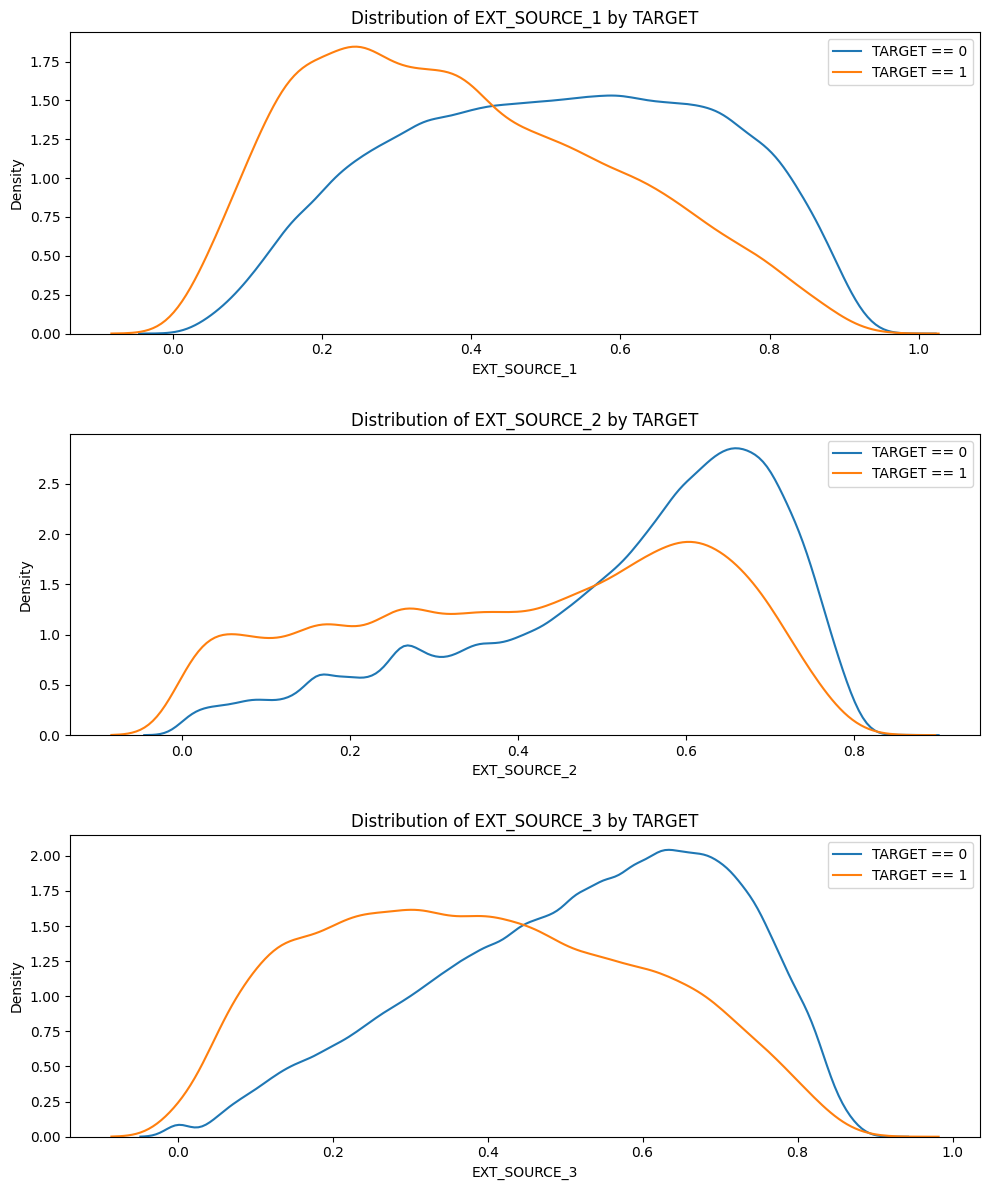

In [ ]:
plt.figure(figsize = (10,12))

for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):

    plt.subplot(3, 1, i+1)

    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label= "TARGET == 0")

    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label= "TARGET == 1")

    plt.title(f"Distribution of {source} by TARGET")

    plt.xlabel(source); plt.ylabel("Density"); plt.legend()

plt.tight_layout(h_pad = 2.5)

## Fonctionnalités polynomiales

Une méthode simple de construction de fonctionnalités est appelée les fonctionnalités polynomiales. Dans cette méthode, nous créons des fonctionnalités qui sont des puissances de fonctionnalités existantes ainsi que des termes d'interaction entre les fonctionnalités existantes. Par exemple, nous pouvons créer des variables comme EXT_SOURCE_1^2 et EXT_SOURCE_2^2 ainsi que des variables telles que EXT_SOURCE_1 x EXT_SOURCE_2, EXT_SOURCE_1 x EXT_SOURCE_2^2, EXT_SOURCE_1^2 x EXT_SOURCE_2^2, et ainsi de suite. Ces fonctionnalités, qui sont une combinaison de plusieurs variables individuelles, sont appelées termes d'interaction car elles capturent les interactions entre les variables. Dans notre cas, nous allons créer des fonctionnalités polynomiales avec un degré de 3.

In [ ]:
# Créer un nouveau dataframe pour les fonctionnalités polynomiales
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# Imputer pour gérer les valeurs manquantes
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns=['TARGET'])

# Imputer les valeurs manquantes
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures

# Créer l'objet polynomial avec le degré spécifié
poly_transformer = PolynomialFeatures(degree=3)
# Entraîner les fonctionnalités polynomiales
poly_transformer.fit(poly_features)

# Transformer les fonctionnalités
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Forme des fonctionnalités polynomiales : ', poly_features.shape)


Forme des fonctionnalités polynomiales :  (307511, 35)


Cela crée un nombre considérable de nouvelles fonctionnalités. Pour obtenir les noms, nous devons utiliser la méthode `get_feature_names` des fonctionnalités polynomiales.

In [ ]:
poly_transformer.get_feature_names_out(input_features=['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

array(['1', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',
       'EXT_SOURCE_1^2', 'EXT_SOURCE_1 EXT_SOURCE_2',
       'EXT_SOURCE_1 EXT_SOURCE_3', 'EXT_SOURCE_1 DAYS_BIRTH',
       'EXT_SOURCE_2^2', 'EXT_SOURCE_2 EXT_SOURCE_3',
       'EXT_SOURCE_2 DAYS_BIRTH', 'EXT_SOURCE_3^2',
       'EXT_SOURCE_3 DAYS_BIRTH', 'DAYS_BIRTH^2'], dtype=object)

Il y a 35 fonctionnalités avec des fonctionnalités individuelles élevées à des puissances jusqu'au degré 3 et des termes d'interaction. Maintenant, nous pouvons voir si certaines de ces nouvelles fonctionnalités sont corrélées avec la cible.

In [ ]:
# Create a dataframe of the features
poly_features = pd.DataFrame(poly_features,
                             columns = poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2',                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))
# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(35))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
EXT_SOURCE_3                             -0.155892
EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH     -0.155891
EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH     -0.151816
EXT_SOURCE_1 EXT_SOURCE_3^2              -0.150822
EXT_SOURCE_3 DAYS_BIRTH                  -0.150109
EXT_SOURCE_2^2                           -0.149512
EXT_SOURCE_2^2 DAYS_BIRTH                -0.149313
EXT_SOURCE_3^2 DAYS_BIRTH                -0.141777
EXT_SOURCE_3^2                           -0.141662
EXT_SOURCE_2^3                 

Plusieurs des nouvelles variables présentent une corrélation plus élevée avec la cible TARGET que les variables d'origine. Lorsque l'on construit des modèles de machine learning, nous pouvons essayer avec et sans ces variables construites polynomialement pour déterminer si elles aident réellement le modèle à apprendre.

Nous ajouterons ces fonctionnalités à une copie des données d'entraînement et de test, puis évaluerons les modèles avec et sans les fonctionnalités.

In [ ]:
# Mettre les nouvelles variables dans le dataframe de test
poly_features_test = pd.DataFrame(poly_features_test,
                                  columns = poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2',
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))
# Supprimer les colonnes en doublon
cols_to_drop = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']
poly_features.drop(cols_to_drop, axis=1, inplace=True)
poly_features_test.drop(cols_to_drop, axis=1, inplace=True)

# Fusionner les caractéristiques polynomiales dans le dataframe d'entraînement
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Fusionner les caractéristiques polynomiales dans le dataframe de test
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Aligner les dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Imprimer les nouvelles formes
print("Forme des données d'entraînement avec les caractéristiques polynomiales :" , app_train_poly.shape)
print("Forme des données de test avec les caractéristiques polynomiales :  ", app_test_poly.shape)


Forme des données d'entraînement avec les caractéristiques polynomiales : (307511, 274)
Forme des données de test avec les caractéristiques polynomiales :   (48744, 274)


In [ ]:
print(app_train_poly.columns.tolist())
print(app_train.columns.tolist())

['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MO

In [ ]:
# Vérifier la présence de la colonne "DAYS_BIRTH" dans app_train
if 'DAYS_BIRTH' in app_train.columns:
    print("La colonne 'DAYS_BIRTH' est présente dans app_train.")
else:
    print("La colonne 'DAYS_BIRTH' n'est pas présente dans app_train.")

# Vérifier la présence de la colonne "DAYS_BIRTH" dans app_train_poly
if 'DAYS_BIRTH' in app_train_poly.columns:
    print("La colonne 'DAYS_BIRTH' est présente dans app_train_poly.")
else:
    print("La colonne 'DAYS_BIRTH' n'est pas présente dans app_train_poly.")


La colonne 'DAYS_BIRTH' est présente dans app_train.
La colonne 'DAYS_BIRTH' est présente dans app_train_poly.


## Quelques nouvelles caractérisques simples

Pour améliorer la performance de notre modèle, nous allons intégrer de nouvelles caractéristiques qui pourraient capturer des relations importantes et enrichir les données. Ces nouvelles caractéristiques sont ajoutées après avoir généré des caractéristiques polynomiales à partir de variables soigneusement sélectionnées. En ajoutant des caractéristiques basées sur des pourcentages, nous pouvons encore augmenter la richesse des informations disponibles pour notre modèle. Cela peut être utile pour améliorer sa capacité à généraliser et à prédire avec précision.



In [ ]:
# Génération de caractéristiques pertinentes à partir des données d'entraînement et de test
app_train_features = app_train_poly.copy()
app_test_features = app_test_poly.copy()

# Ajout des nouvelles caractéristiques
app_train_features['DAYS_EMPLOYED_PERC'] = app_train_features['DAYS_EMPLOYED'] / app_train_features['DAYS_BIRTH']
app_train_features['INCOME_CREDIT_PERC'] = app_train_features['AMT_INCOME_TOTAL'] / app_train_features['AMT_CREDIT']
app_train_features['INCOME_PER_PERSON'] = app_train_features['AMT_INCOME_TOTAL'] / app_train_features['CNT_FAM_MEMBERS']
app_train_features['ANNUITY_INCOME_PERC'] = app_train_features['AMT_ANNUITY'] / app_train_features['AMT_INCOME_TOTAL']
app_train_features['PAYMENT_RATE'] = app_train_features['AMT_ANNUITY'] / app_train_features['AMT_CREDIT']

app_test_features['DAYS_EMPLOYED_PERC'] = app_test_features['DAYS_EMPLOYED'] / app_test_features['DAYS_BIRTH']
app_test_features['INCOME_CREDIT_PERC'] = app_test_features['AMT_INCOME_TOTAL'] / app_test_features['AMT_CREDIT']
app_test_features['INCOME_PER_PERSON'] = app_test_features['AMT_INCOME_TOTAL'] / app_test_features['CNT_FAM_MEMBERS']
app_test_features['ANNUITY_INCOME_PERC'] = app_test_features['AMT_ANNUITY'] / app_test_features['AMT_INCOME_TOTAL']
app_test_features['PAYMENT_RATE'] = app_test_features['AMT_ANNUITY'] / app_test_features['AMT_CREDIT']

# Affichage de la forme des nouveaux dataframes
print("Forme du dataframe d'entraînement avec les nouvelles caractéristiques :", app_train_features.shape)
print("Forme du dataframe de test avec les nouvelles caractéristiques :", app_test_features.shape)


Forme du dataframe d'entraînement avec les nouvelles caractéristiques : (307511, 279)
Forme du dataframe de test avec les nouvelles caractéristiques : (48744, 279)


In [ ]:
# Chemin vers le dossier sur Google Drive où vous souhaitez enregistrer les fichiers
folder_path = '/content/drive/MyDrive/oc_projet_4/Data/'

# Exportez les données traitées vers Google Drive
app_train.to_csv(folder_path + 'app_train_traitees.csv', index=False)
app_test.to_csv(folder_path + 'app_test_traitees.csv', index=False)
app_train_features.to_csv(folder_path + 'app_train_features.csv', index=False)
app_test_features.to_csv(folder_path + 'app_test_features.csv', index=False)
